In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings

In [2]:
data=pd.read_csv('loan_data.csv')

<h1>Basic Info about data</h1>

In [2]:
data.sample(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
37764,24.0,female,High School,144954.0,5,MORTGAGE,2464.0,EDUCATION,11.53,0.02,3.0,552,Yes,0
14154,24.0,female,High School,120899.0,0,MORTGAGE,12000.0,VENTURE,12.18,0.10,3.0,487,Yes,0
38217,28.0,female,Bachelor,116280.0,7,RENT,15000.0,EDUCATION,10.07,0.13,9.0,583,Yes,0
27067,27.0,male,Master,144975.0,6,MORTGAGE,10000.0,HOMEIMPROVEMENT,11.14,0.07,6.0,658,Yes,0
30445,38.0,male,Master,57393.0,16,RENT,7000.0,PERSONAL,13.35,0.12,13.0,679,Yes,0


In [3]:
data.shape

(45000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
data['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [8]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [9]:
from ydata_profiling import ProfileReport
profile=ProfileReport(data)
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 95.15it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# data['person_age']=data['person_age'].astype('int16')
# data['person_emp_exp']=data['person_emp_exp'].astype('int16')
# data['credit_score']=data['credit_score'].astype('int16')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [25]:
data['person_age'].skew()

2.5481540050382425

In [88]:
data.corr(numeric_only=True)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


In [33]:
trf_age=FunctionTransformer(func=lambda x:np.log1p(x.astype(float)))
tmp_data=trf_age.fit_transform(data['person_emp_exp'])
tmp_data.skew()

<IPython.core.display.Javascript object>

-0.12299024997657408

In [36]:
data['person_emp_exp'].skew()

2.5949173726318255

In [41]:
data.duplicated().value_counts()

False    45000
Name: count, dtype: int64

<h1>Impact of Categorical Columns on loan status</h1>

In [56]:
rates = data.groupby('person_gender')['loan_status'].mean()
effect_size = rates.max() - rates.min()
print(rates)
print('Max Percent difference:',effect_size*100,'%')

person_gender
female    0.222481
male      0.222012
Name: loan_status, dtype: float64
Max Percent difference: 0.04692775762665524 %


In [58]:
rates = data.groupby('person_home_ownership')['loan_status'].mean()
effect_size = rates.max() - rates.min()
print(rates)
print('Max Percent difference:',effect_size*100,'%')

person_home_ownership
MORTGAGE    0.115961
OTHER       0.333333
OWN         0.075229
RENT        0.323977
Name: loan_status, dtype: float64
Max Percent difference: 25.810459731164574 %


In [60]:
rates = data.groupby('loan_intent')['loan_status'].mean()
effect_size = rates.max() - rates.min()
print(rates)
print('Max Percent difference:',effect_size*100,'%')

loan_intent
DEBTCONSOLIDATION    0.302729
EDUCATION            0.169562
HOMEIMPROVEMENT      0.263015
MEDICAL              0.278194
PERSONAL             0.201404
VENTURE              0.144264
Name: loan_status, dtype: float64
Max Percent difference: 15.84652088706423 %


In [62]:
rates = data.groupby('previous_loan_defaults_on_file')['loan_status'].mean()
effect_size = rates.max() - rates.min()
print(rates)
print('Max Percent difference:',effect_size*100,'%')

previous_loan_defaults_on_file
No     0.45163
Yes    0.00000
Name: loan_status, dtype: float64
Max Percent difference: 45.163038569234935 %


In [64]:
rates = data.groupby('person_education')['loan_status'].mean()
effect_size = rates.max() - rates.min()
print(rates)
print('Max Percent difference:',effect_size*100,'%')

person_education
Associate      0.220319
Bachelor       0.225241
Doctorate      0.228663
High School    0.223104
Master         0.217622
Name: loan_status, dtype: float64
Max Percent difference: 1.1041669550452409 %


Out of categorical columns person_gender and person_education seem weak features so we will test it

<h1>Impact of Numerical Columns on loan status</h1>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

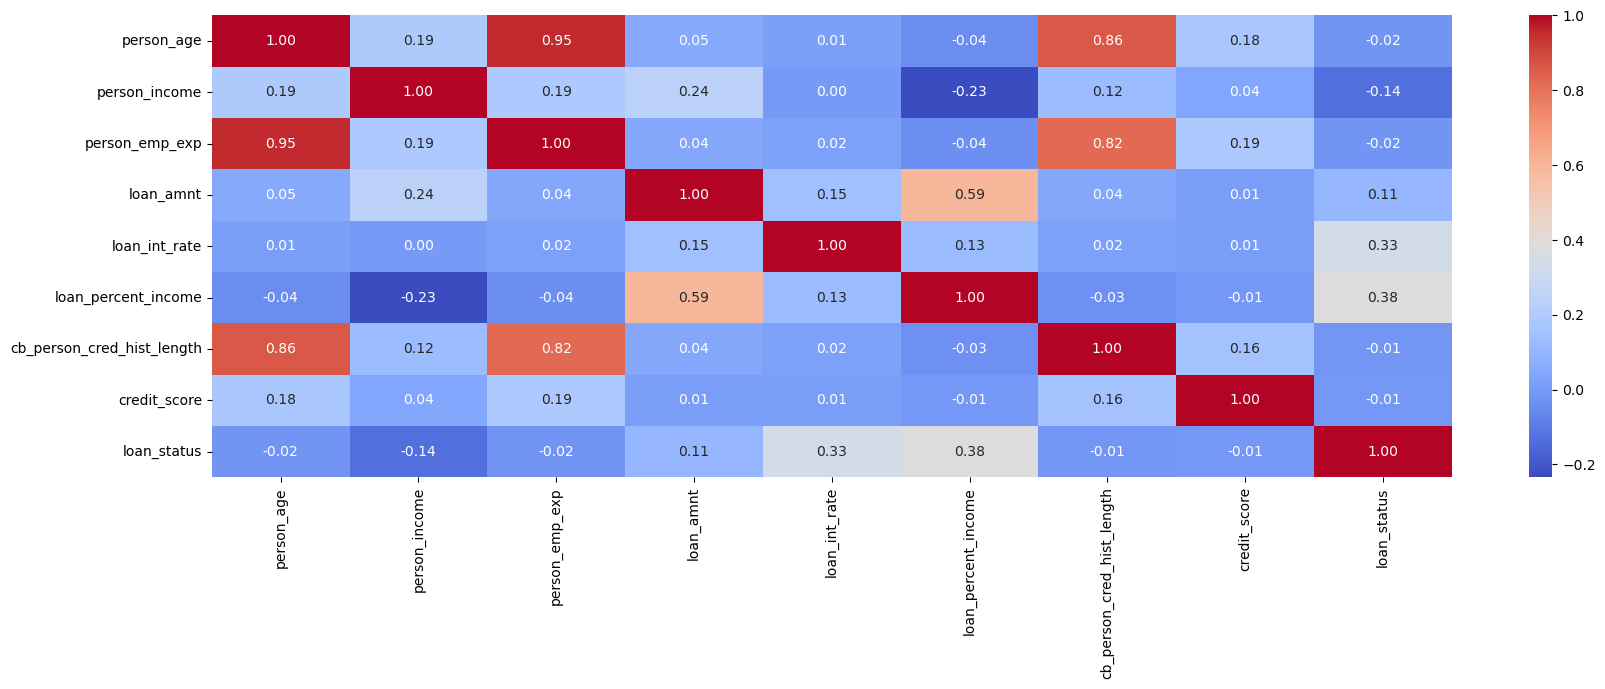

In [4]:
plt.figure(figsize=(20,6))
sns.heatmap(
    data.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.show()

<IPython.core.display.Javascript object>

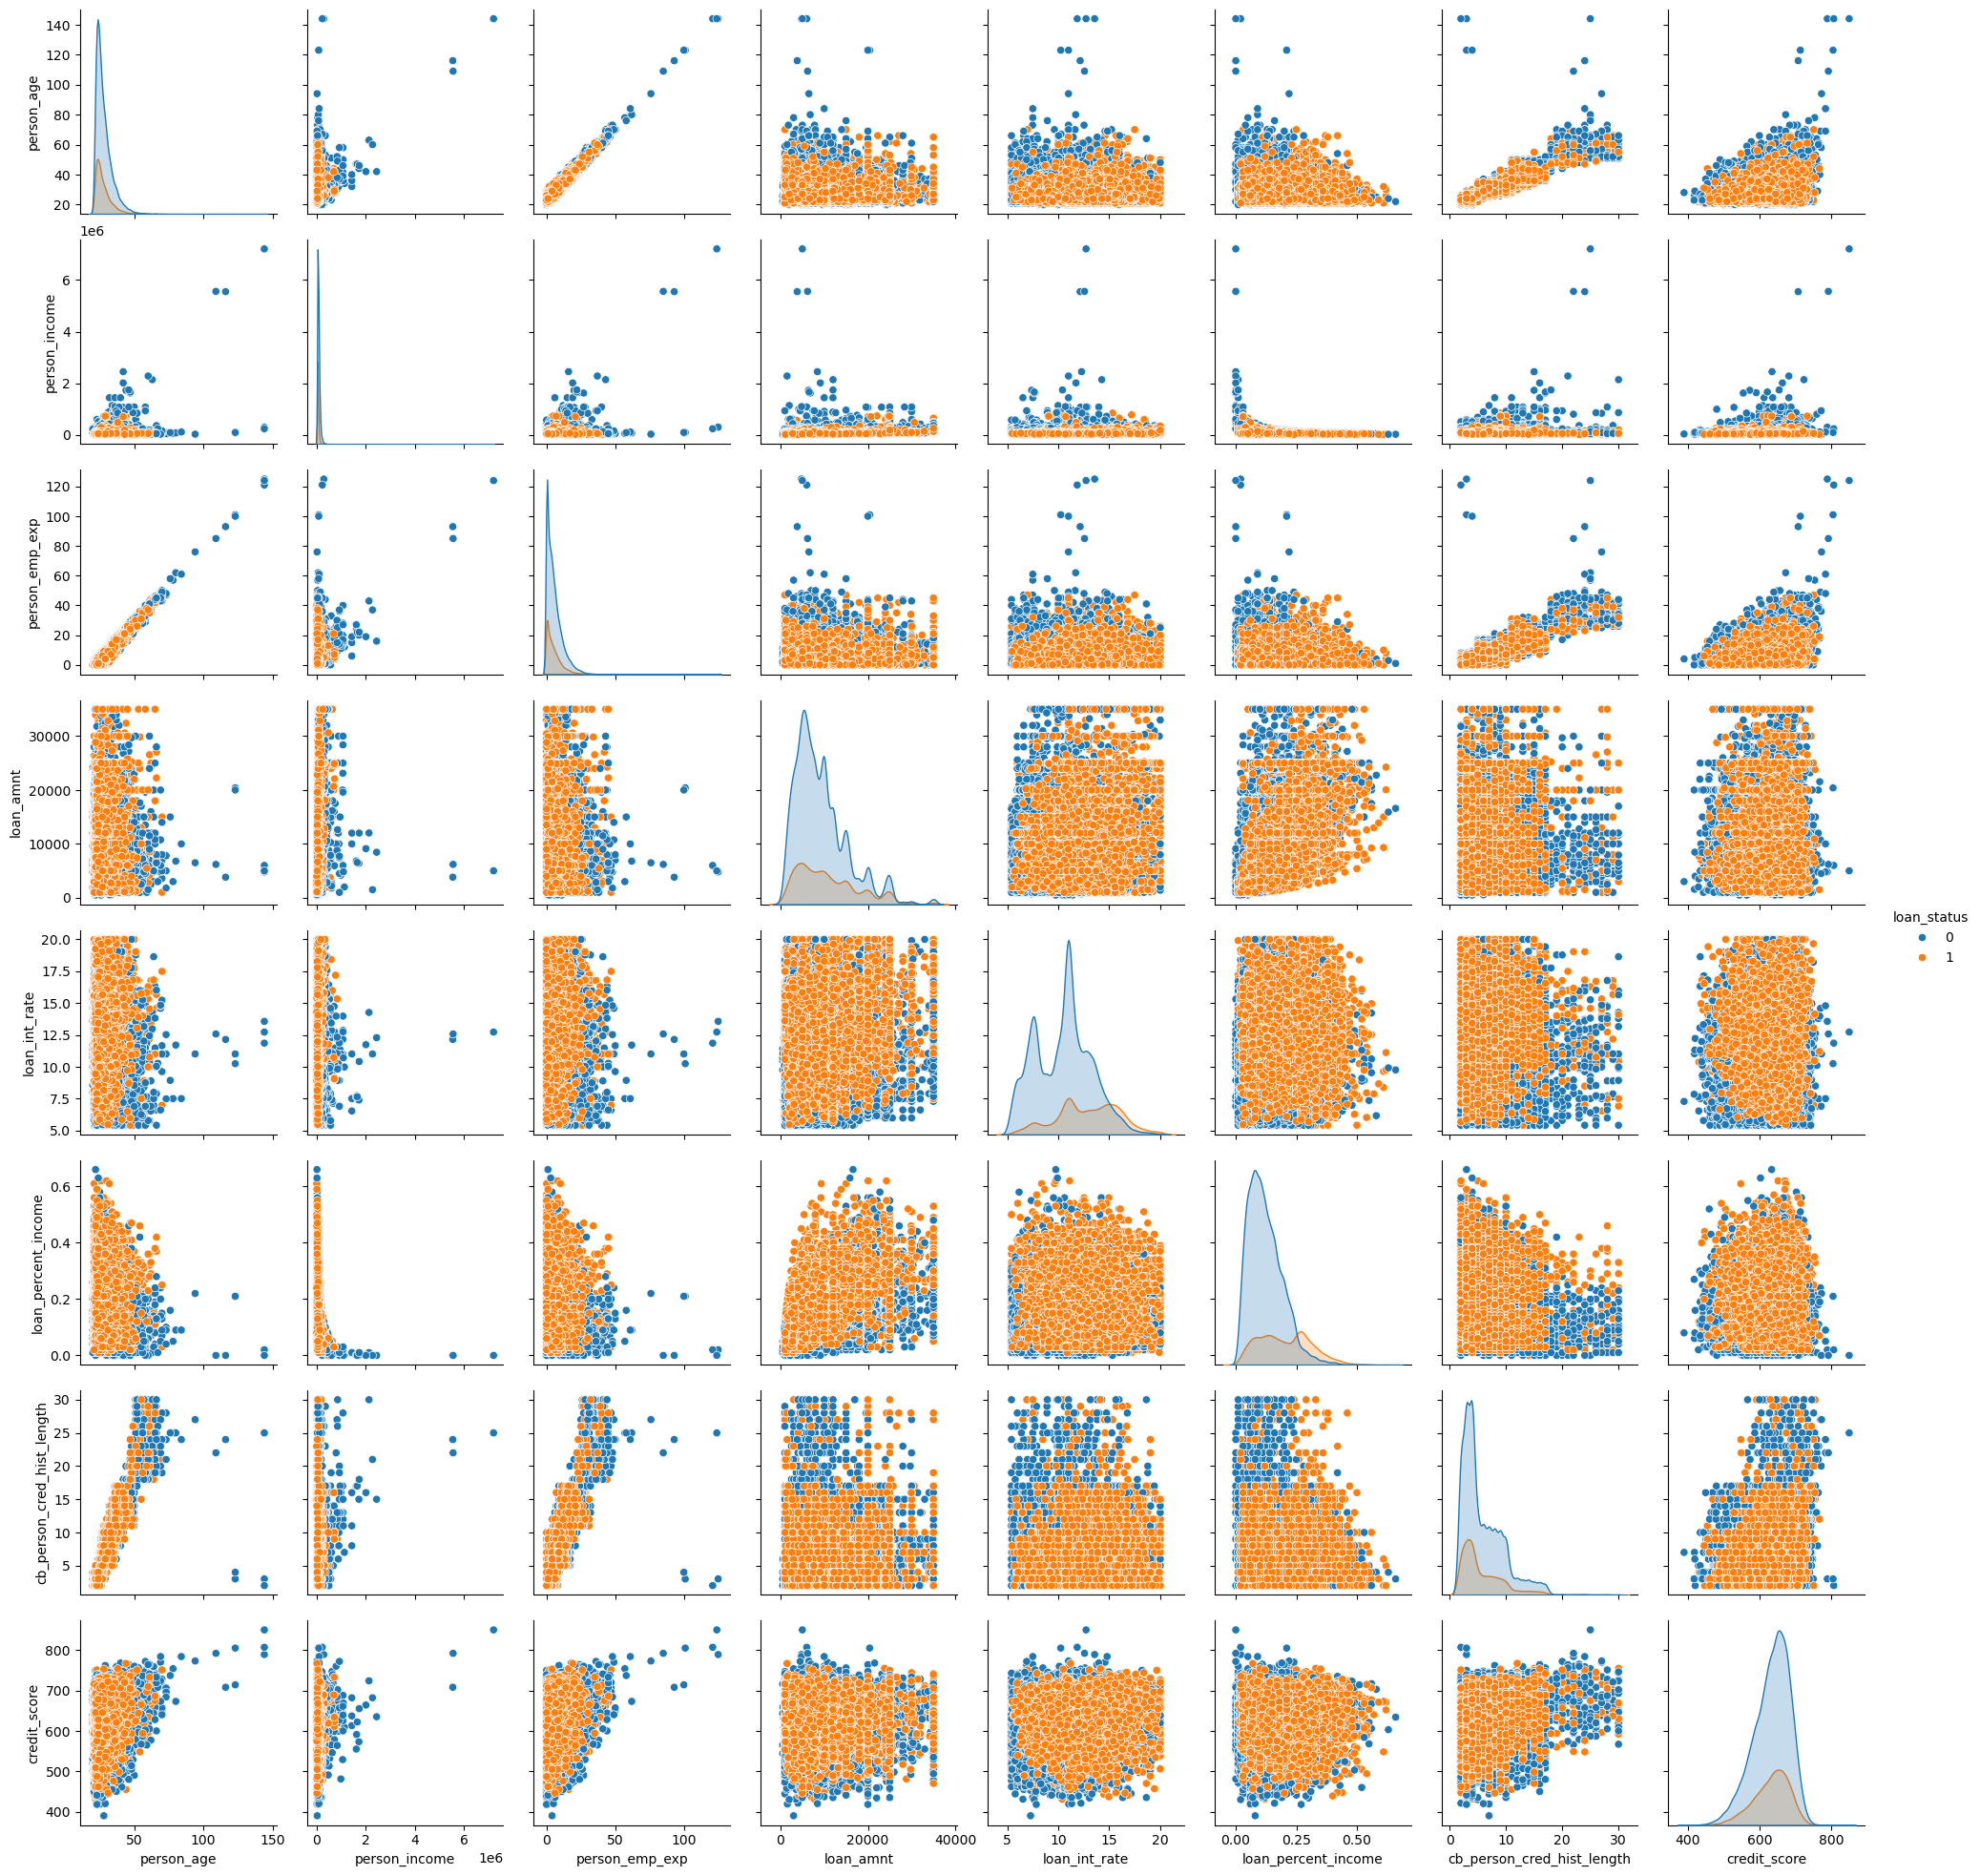

In [2]:
sns.pairplot(data,hue='loan_status')

<h1>Train test split</h1>

In [3]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('loan_status',axis=1),data['loan_status'],test_size=0.2,random_state=40)

<IPython.core.display.Javascript object>

<h1>One Hot and Ordinal Encode</h1>

In [6]:
trf_encode=ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',dtype='int8'),['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']),
    ('oe',OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']],dtype='int8'),['person_education'])
],remainder='passthrough')
trf_encode.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first', dtype='int8',
                                               sparse_output=False),
                                 ['person_gender', 'person_home_ownership',
                                  'loan_intent',
                                  'previous_loan_defaults_on_file']),
                                ('oe',
                                 OrdinalEncoder(categories=[['High School',
                                                             'Associate',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctorate']],
                                                dtype='int8'),
                                 ['person_education'])])

In [8]:
X_train_trf1=trf_encode.fit_transform(X_train)
X_train_trf1.head()

,ohe__person_gender_male,ohe__person_home_ownership_OTHER,ohe__person_home_ownership_OWN,ohe__person_home_ownership_RENT,ohe__loan_intent_EDUCATION,ohe__loan_intent_HOMEIMPROVEMENT,ohe__loan_intent_MEDICAL,ohe__loan_intent_PERSONAL,ohe__loan_intent_VENTURE,ohe__previous_loan_defaults_on_file_Yes,oe__person_education,remainder__person_age,remainder__person_income,remainder__person_emp_exp,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__credit_score
19877,0,0,0,1,0,1,0,0,0,0,2,29.0,63397.0,4,11000.0,15.62,0.17,10.0,710
33646,0,0,0,0,1,0,0,0,0,1,0,26.0,102859.0,5,2568.0,8.25,0.02,3.0,548
7506,1,0,0,1,0,1,0,0,0,1,0,25.0,85098.0,3,6800.0,5.42,0.08,2.0,618
4589,1,0,1,0,1,0,0,0,0,1,3,22.0,51122.0,2,12000.0,12.42,0.23,2.0,728
43520,1,0,0,1,0,0,0,0,0,0,0,26.0,42945.0,3,14566.0,10.76,0.34,3.0,579


In [9]:
X_train_trf1.shape

(36000, 19)

In [10]:
X_test_trf1=trf_encode.transform(X_test)

In [11]:
X_train_trf1.describe()

,ohe__person_gender_male,ohe__person_home_ownership_OTHER,ohe__person_home_ownership_OWN,ohe__person_home_ownership_RENT,ohe__loan_intent_EDUCATION,ohe__loan_intent_HOMEIMPROVEMENT,ohe__loan_intent_MEDICAL,ohe__loan_intent_PERSONAL,ohe__loan_intent_VENTURE,ohe__previous_loan_defaults_on_file_Yes,oe__person_education,remainder__person_age,remainder__person_income,remainder__person_emp_exp,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__credit_score
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,3.600000e+04,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,0.551611,0.002667,0.065417,0.521639,0.202389,0.107361,0.188417,0.167278,0.174500,0.509556,1.384667,27.762944,8.034324e+04,5.412000,9556.736028,11.011952,0.139179,5.868417,632.500667
std,0.497336,0.051572,0.247263,0.499538,0.401786,0.309576,0.391050,0.373229,0.379544,0.499916,1.077784,6.007146,7.586322e+04,6.020399,6313.050671,2.991459,0.087091,3.869915,50.420823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,4.729300e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,26.000000,6.708300e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,639.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,30.000000,9.628050e+04,8.000000,12025.000000,13.040000,0.190000,8.000000,670.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,805.000000


In [12]:
logReg=LogisticRegression()
logReg.fit(X_train_trf1,y_train)
y_pred=logReg.predict(X_test_trf1)
accuracy_score(y_test,y_pred)*100

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.13333333333334

In [14]:
confusion_matrix(y_test,y_pred)

array([[6654,  330],
       [1278,  738]], dtype=int64)

In [15]:
X_train_tot=trf_encode.transform(data.drop('loan_status',axis=1))

In [18]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("accuracy:",np.mean(cross_val_score(logReg,X_train_tot,data['loan_status'],scoring='accuracy',cv=10)))
    print("precision:",np.mean(cross_val_score(logReg,X_train_tot,data['loan_status'],scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(logReg,X_train_tot,data['loan_status'],scoring='f1_macro',cv=10)))

accuracy: 0.8284444444444444
precision: 0.7003542431527148
f1 score: 0.7055204559882315


<h1>Transformation on Age</h1>

In [79]:
data['person_age'].skew()

2.5481540050382425

In [44]:
trf_age=FunctionTransformer(func=lambda x:np.sqrt(x.astype(float)))
tmp_data=trf_age.fit_transform(data['person_age'])
tmp_data.skew()

<IPython.core.display.Javascript object>

1.6681958708376459

In [46]:
trf_age=FunctionTransformer(func=lambda x:np.power(x.astype(float),0.0001))
tmp_data=trf_age.fit_transform(data['person_age'])
tmp_data.skew()

<IPython.core.display.Javascript object>

1.1991350672903254

In [48]:
trf_age=FunctionTransformer(func=lambda x:np.log1p(x.astype(float)))
tmp_data=trf_age.fit_transform(data['person_age'])
tmp_data.skew()

<IPython.core.display.Javascript object>

1.2202035131844058

In [61]:
trf_age=PowerTransformer()
tmp_data=trf_age.fit_transform(data[['person_age']])
tmp_data=pd.Series(tmp_data.flatten())
tmp_data.skew()

<IPython.core.display.Javascript object>

0.13935234370594818

Yeo Johnson is best for this 

<h1>Transformation of Person Income</h1>

In [78]:
data['person_income'].skew()

34.137583132969915

In [64]:
trf_income=FunctionTransformer(func=lambda x:np.log1p(x.astype(float)))
tmp_data2=trf_income.fit_transform(data['person_income'])
trf_income.set_output(transform='pandas')
tmp_data2.skew()

<IPython.core.display.Javascript object>

0.22401825307468148

In [65]:
trf_income=FunctionTransformer(func=lambda x:np.power(x.astype(float),0.00001))
tmp_data2=trf_income.fit_transform(data['person_income'])
trf_income.set_output(transform='pandas')
tmp_data2.skew()

<IPython.core.display.Javascript object>

0.22400540825202386

In [67]:
trf_income=PowerTransformer()
tmp_data2=trf_income.fit_transform(data[['person_income']])
tmp_data2=pd.Series(tmp_data2.flatten())
tmp_data2.skew()

<IPython.core.display.Javascript object>

-0.0178950289273075

Yeo Johnson is best for income as well

<h1>Transformation of Employment Experience</h1>

In [69]:
data['person_emp_exp'].skew()

2.5949173726318255

In [68]:
trf_emp_exp=FunctionTransformer(func=lambda x:np.log1p(x.astype(float)))
tmp_data3=trf_emp_exp.fit_transform(data['person_emp_exp'])
trf_emp_exp.set_output(transform='pandas')
tmp_data3.skew()

<IPython.core.display.Javascript object>

-0.12299024997657408

In [71]:
trf_emp_exp=FunctionTransformer(func=lambda x:np.power(x.astype(float),0.00001))
tmp_data3=trf_emp_exp.fit_transform(data['person_emp_exp'])
trf_emp_exp.set_output(transform='pandas')
tmp_data3.skew()

<IPython.core.display.Javascript object>

-1.4050832288326276

In [72]:
trf_emp_exp=PowerTransformer()
tmp_data3=trf_emp_exp.fit_transform(data[['person_emp_exp']])
tmp_data3=pd.Series(tmp_data3.flatten())
tmp_data3.skew()

<IPython.core.display.Javascript object>

-0.021322468319140347

Yeo Johnson better again for emp_exp

<h1>Transformation of loan amount</h1>

In [73]:
data['loan_amnt'].skew()

1.1797312856279223

In [74]:
trf_loan_amnt=FunctionTransformer(func=lambda x:np.log1p(x.astype(float)))
tmp_data4=trf_loan_amnt.fit_transform(data['person_emp_exp'])
trf_loan_amnt.set_output(transform='pandas')
tmp_data4.skew()

<IPython.core.display.Javascript object>

-0.12299024997657408

In [75]:
trf_loan_amnt=FunctionTransformer(func=lambda x:np.power(x.astype(float),0.00001))
tmp_data4=trf_loan_amnt.fit_transform(data['person_emp_exp'])
trf_loan_amnt.set_output(transform='pandas')
tmp_data4.skew()

<IPython.core.display.Javascript object>

-1.4050832288326276

In [76]:
trf_loan_amnt=PowerTransformer()
tmp_data4=trf_loan_amnt.fit_transform(data[['loan_amnt']])
tmp_data4=pd.Series(tmp_data4.flatten())
tmp_data4.skew()

<IPython.core.display.Javascript object>

-0.021640360100223553

Yeo Johnson better for loan amnt

<h1>Transformation on loan interest rates</h1>

In [80]:
data['loan_int_rate'].skew()

0.21378407238735642

Already skew is fine no need to transform

<h1>Transformation on loan percent income</h1>

In [82]:
data['loan_percent_income'].skew()

1.034512151182724

In [84]:
trf_loan_percent_income=PowerTransformer()
tmp_data5=trf_loan_percent_income.fit_transform(data[['loan_percent_income']])
tmp_data5=pd.Series(tmp_data5.flatten())
tmp_data5.skew()

<IPython.core.display.Javascript object>

0.09130999017781845

Yeo johnson can be applied to loan percent income as well

<h1>Transformation on cb_person_cred_hist_length</h1>

In [86]:
data['cb_person_cred_hist_length'].skew()

1.6317199538415355

In [88]:
trf_cb_person_cred_hist_length=FunctionTransformer(func=lambda x:np.log1p(x.astype(float)))
tmp_data6=trf_cb_person_cred_hist_length.fit_transform(data['person_emp_exp'])
trf_cb_person_cred_hist_length.set_output(transform='pandas')
tmp_data6.skew()

<IPython.core.display.Javascript object>

-0.12299024997657408

In [89]:
trf_cb_person_cred_hist_length=PowerTransformer()
tmp_data6=trf_cb_person_cred_hist_length.fit_transform(data[['loan_amnt']])
tmp_data6=pd.Series(tmp_data6.flatten())
tmp_data6.skew()

<IPython.core.display.Javascript object>

-0.021640360100223553

Yeo johnson is applied to cb_person_cred_hist_length

<h1>Transformation on Credit Score</h1>

In [91]:
data['credit_score'].skew()

-0.6102608322577946

Leave it as it's meaning is more import than it's skewness in this case

In [21]:
num_pipe=Pipeline([
    ('power', PowerTransformer()),
    ('scaler', StandardScaler())
])

In [22]:
trf_encode_transform_scale=ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',dtype='int8'),['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']),
    ('oe',OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']],dtype='int8'),['person_education']),
    ('num',num_pipe,['person_age','person_income','person_emp_exp','loan_amnt','loan_percent_income','cb_person_cred_hist_length'])
],remainder='passthrough')
trf_encode_transform_scale.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first', dtype='int8',
                                               sparse_output=False),
                                 ['person_gender', 'person_home_ownership',
                                  'loan_intent',
                                  'previous_loan_defaults_on_file']),
                                ('oe',
                                 OrdinalEncoder(categories=[['High School',
                                                             'Associate',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctorate']],
                                                dtype='int8'),
                                 ['person_education']),
                                ('num',
                                 Pipeline(steps=[('power', PowerTransformer()),
                                                 ('scaler', StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_exp', 'loan_amnt',
                                  'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [23]:
X_train_trf2=trf_encode_transform_scale.fit_transform(X_train)
X_test_trf2=trf_encode_transform_scale.transform(X_test)

In [104]:
X_train_trf2.head()

,ohe__person_gender_male,ohe__person_home_ownership_OTHER,ohe__person_home_ownership_OWN,ohe__person_home_ownership_RENT,ohe__loan_intent_EDUCATION,ohe__loan_intent_HOMEIMPROVEMENT,ohe__loan_intent_MEDICAL,ohe__loan_intent_PERSONAL,ohe__loan_intent_VENTURE,ohe__previous_loan_defaults_on_file_Yes,oe__person_education,num__person_age,num__person_income,num__person_emp_exp,num__loan_amnt,num__loan_percent_income,num__cb_person_cred_hist_length,remainder__loan_int_rate,remainder__credit_score
19877,0,0,0,1,0,1,0,0,0,0,2,0.569491,-0.095814,0.146420,0.467775,0.571719,1.193375,15.62,710
33646,0,0,0,0,1,0,0,0,0,1,0,-0.067711,0.761844,0.339195,-1.458121,-1.853115,-0.802248,8.25,548
7506,1,0,0,1,0,1,0,0,0,1,0,-0.339376,0.430284,-0.086072,-0.241282,-0.651999,-1.553393,5.42,618
4589,1,0,1,0,1,0,0,0,0,1,3,-1.418723,-0.489181,-0.380304,0.604615,1.133738,-1.553393,12.42,728
43520,1,0,0,1,0,0,0,0,0,0,0,-0.067711,-0.813320,-0.086072,0.919366,1.837670,-0.802248,10.76,579


In [24]:
%%capture --no-display
logReg2=LogisticRegression(max_iter=1000, tol=1e-3)
logReg2.fit(X_train_trf2,y_train)
y_pred2=logReg2.predict(X_test_trf2)

In [20]:
X_train_trf2.describe()

,ohe__person_gender_male,ohe__person_home_ownership_OTHER,ohe__person_home_ownership_OWN,ohe__person_home_ownership_RENT,ohe__loan_intent_EDUCATION,ohe__loan_intent_HOMEIMPROVEMENT,ohe__loan_intent_MEDICAL,ohe__loan_intent_PERSONAL,ohe__loan_intent_VENTURE,ohe__previous_loan_defaults_on_file_Yes,oe__person_education,num__person_age,num__person_income,num__person_emp_exp,num__loan_amnt,num__loan_percent_income,num__cb_person_cred_hist_length,remainder__loan_int_rate,remainder__credit_score
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,36000.000000,36000.000000
mean,0.551611,0.002667,0.065417,0.521639,0.202389,0.107361,0.188417,0.167278,0.174500,0.509556,1.384667,3.157968e-18,-1.914518e-17,-3.824102e-17,-9.276530e-18,-2.565849e-17,8.832441e-18,11.011952,632.500667
std,0.497336,0.051572,0.247263,0.499538,0.401786,0.309576,0.391050,0.373229,0.379544,0.499916,1.077784,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,2.991459,50.420823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.459338e+00,-4.209337e+00,-1.449072e+00,-2.978936e+00,-2.350023e+00,-1.553393e+00,5.420000,390.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.498346e-01,-6.333463e-01,-7.847082e-01,-6.552600e-01,-8.262691e-01,-8.022482e-01,8.590000,601.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-6.771109e-02,6.249924e-03,1.464204e-01,-1.039068e-02,-3.903589e-02,-2.821308e-01,11.010000,639.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,7.362899e-01,6.468695e-01,7.771608e-01,6.079215e-01,7.770998e-01,8.652830e-01,13.040000,670.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.671120e+00,6.589958e+00,3.965466e+00,2.531809e+00,2.741370e+00,2.492094e+00,20.000000,805.000000


In [28]:
X_train_trf2.columns

Index(['ohe__person_gender_male', 'ohe__person_home_ownership_OTHER',
       'ohe__person_home_ownership_OWN', 'ohe__person_home_ownership_RENT',
       'ohe__loan_intent_EDUCATION', 'ohe__loan_intent_HOMEIMPROVEMENT',
       'ohe__loan_intent_MEDICAL', 'ohe__loan_intent_PERSONAL',
       'ohe__loan_intent_VENTURE', 'ohe__previous_loan_defaults_on_file_Yes',
       'oe__person_education', 'num__person_age', 'num__person_income',
       'num__person_emp_exp', 'num__loan_amnt', 'num__loan_percent_income',
       'num__cb_person_cred_hist_length', 'remainder__loan_int_rate',
       'remainder__credit_score'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='num__cb_person_cred_hist_length', ylabel='Density'>

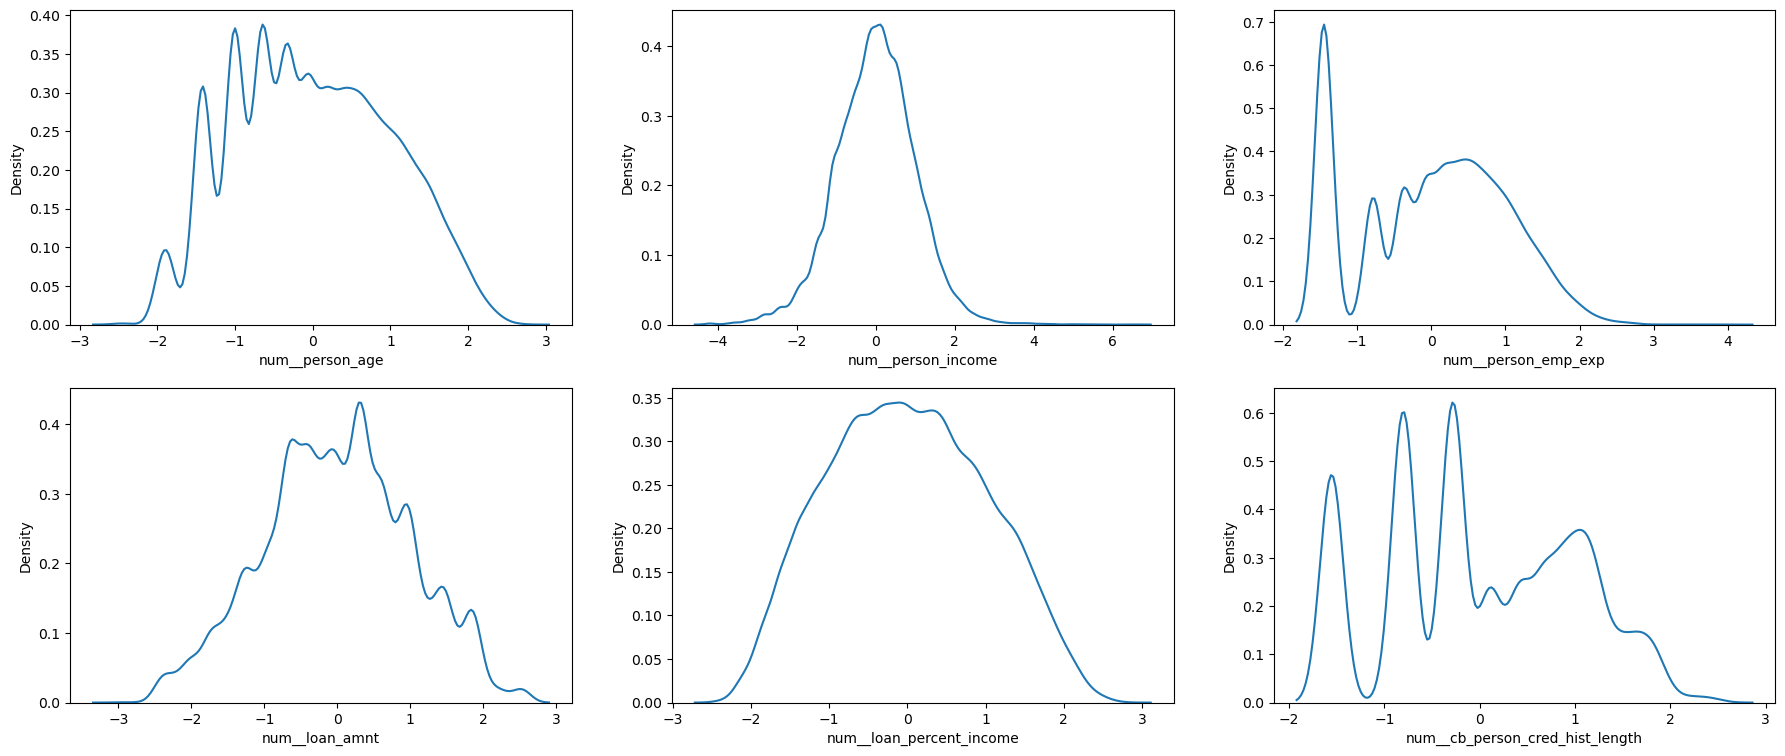

In [43]:
fig,ax=plt.subplots(2,3,figsize=(22,9))
sns.kdeplot(X_train_trf2['num__person_age'],ax=ax[0][0])
sns.kdeplot(X_train_trf2['num__person_income'],ax=ax[0][1])
sns.kdeplot(X_train_trf2['num__person_emp_exp'],ax=ax[0][2])
sns.kdeplot(X_train_trf2['num__loan_amnt'],ax=ax[1][0])
sns.kdeplot(X_train_trf2['num__loan_percent_income'],ax=ax[1][1])
sns.kdeplot(X_train_trf2['num__cb_person_cred_hist_length'],ax=ax[1][2])

<h1>Checking if without transformation there is any improvement</h1>

In [25]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("accuracy:",np.mean(cross_val_score(logReg2,X_train_tot,data['loan_status'],scoring='accuracy',cv=10)))
    print("precision:",np.mean(cross_val_score(logReg2,X_train_tot,data['loan_status'],scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(logReg2,X_train_tot,data['loan_status'],scoring='f1_macro',cv=10)))

accuracy: 0.8827333333333331
precision: 0.7421704101617635
f1 score: 0.8290841109815187


In [26]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    trf_encode_transform_scale_without_age=ColumnTransformer([
        ('ohe',OneHotEncoder(sparse_output=False,drop='first',dtype='int8'),['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']),
        ('oe',OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']],dtype='int8'),['person_education']),
        ('num',num_pipe,['person_income','person_emp_exp','loan_amnt','loan_percent_income','cb_person_cred_hist_length'])
    ],remainder='passthrough')
    trf_encode_transform_scale_without_age.set_output(transform='pandas')
    
    X_train_trf3=trf_encode_transform_scale_without_age.fit_transform(X_train)
    X_test_trf3=trf_encode_transform_scale_without_age.transform(X_test)
    
    logReg3=LogisticRegression(max_iter=1000, tol=1e-3)
    logReg3.fit(X_train_trf3,y_train)
    y_pred3=logReg3.predict(X_test_trf3)

    print("accuracy:",np.mean(cross_val_score(logReg3,X_train_tot,data['loan_status'],scoring='accuracy',cv=10)))
    print("precision:",np.mean(cross_val_score(logReg3,X_train_tot,data['loan_status'],scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(logReg3,X_train_tot,data['loan_status'],scoring='f1_macro',cv=10)))

accuracy: 0.8827333333333331
precision: 0.7421704101617635
f1 score: 0.8290841109815187


In [65]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    trf_encode_transform_scale_without_income=ColumnTransformer([
        ('ohe',OneHotEncoder(sparse_output=False,drop='first',dtype='int8'),['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']),
        ('oe',OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']],dtype='int8'),['person_education']),
        ('num',num_pipe,['person_age','person_emp_exp','loan_amnt','loan_percent_income','cb_person_cred_hist_length'])
    ],remainder='passthrough')
    trf_encode_transform_scale_without_income.set_output(transform='pandas')
    
    X_train_trf4=trf_encode_transform_scale_without_income.fit_transform(X_train)
    X_test_trf4=trf_encode_transform_scale_without_income.transform(X_test)
    
    logReg4=LogisticRegression(max_iter=1000, tol=1e-3)
    logReg4.fit(X_train_trf4,y_train)
    y_pred4=logReg4.predict(X_test_trf4)

    print("accuracy:",np.mean(cross_val_score(logReg4,X_train_tot,data['loan_status'],scoring='accuracy',cv=10)))
    print("precision:",np.mean(cross_val_score(logReg4,X_train_tot,data['loan_status'],scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(logReg4,X_train_tot,data['loan_status'],scoring='f1_macro',cv=10)))

<IPython.core.display.Javascript object>

accuracy: 0.8827333333333331


<IPython.core.display.Javascript object>

precision: 0.7421704101617635


<IPython.core.display.Javascript object>

f1 score: 0.8290841109815187


In [66]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    trf_encode_transform_scale_without_emp_exp=ColumnTransformer([
        ('ohe',OneHotEncoder(sparse_output=False,drop='first',dtype='int8'),['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']),
        ('oe',OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']],dtype='int8'),['person_education']),
        ('num',num_pipe,['person_age','person_income','loan_amnt','loan_percent_income','cb_person_cred_hist_length'])
    ],remainder='passthrough')
    trf_encode_transform_scale_without_emp_exp.set_output(transform='pandas')
    
    X_train_trf5=trf_encode_transform_scale_without_emp_exp.fit_transform(X_train)
    X_test_trf5=trf_encode_transform_scale_without_emp_exp.transform(X_test)
    
    logReg5=LogisticRegression(max_iter=1000, tol=1e-3)
    logReg5.fit(X_train_trf5,y_train)
    y_pred5=logReg5.predict(X_test_trf5)

    print("accuracy:",np.mean(cross_val_score(logReg5,X_train_tot,data['loan_status'],scoring='accuracy',cv=10)))
    print("precision:",np.mean(cross_val_score(logReg5,X_train_tot,data['loan_status'],scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(logReg5,X_train_tot,data['loan_status'],scoring='f1_macro',cv=10)))

<IPython.core.display.Javascript object>

accuracy: 0.8827333333333331


<IPython.core.display.Javascript object>

precision: 0.7421704101617635


<IPython.core.display.Javascript object>

f1 score: 0.8290841109815187


In [67]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    trf_encode_transform_scale_without_loan_amnt=ColumnTransformer([
        ('ohe',OneHotEncoder(sparse_output=False,drop='first',dtype='int8'),['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']),
        ('oe',OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']],dtype='int8'),['person_education']),
        ('num',num_pipe,['person_age','person_income','person_emp_exp','loan_percent_income','cb_person_cred_hist_length'])
    ],remainder='passthrough')
    trf_encode_transform_scale_without_loan_amnt.set_output(transform='pandas')
    
    X_train_trf6=trf_encode_transform_scale_without_loan_amnt.fit_transform(X_train)
    X_test_trf6=trf_encode_transform_scale_without_loan_amnt.transform(X_test)
    
    logReg6=LogisticRegression(max_iter=1000, tol=1e-3)
    logReg6.fit(X_train_trf6,y_train)
    y_pred6=logReg6.predict(X_test_trf6)

    print("accuracy:",np.mean(cross_val_score(logReg6,X_train_tot,data['loan_status'],scoring='accuracy',cv=10)))
    print("precision:",np.mean(cross_val_score(logReg6,X_train_tot,data['loan_status'],scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(logReg6,X_train_tot,data['loan_status'],scoring='f1_macro',cv=10)))

<IPython.core.display.Javascript object>

accuracy: 0.8827333333333331


<IPython.core.display.Javascript object>

precision: 0.7421704101617635


<IPython.core.display.Javascript object>

f1 score: 0.8290841109815187


In [68]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    trf_encode_transform_scale_without_loan_percent_income=ColumnTransformer([
        ('ohe',OneHotEncoder(sparse_output=False,drop='first',dtype='int8'),['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']),
        ('oe',OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']],dtype='int8'),['person_education']),
        ('num',num_pipe,['person_age','person_income','person_emp_exp','loan_amnt','cb_person_cred_hist_length'])
    ],remainder='passthrough')
    trf_encode_transform_scale_without_loan_percent_income.set_output(transform='pandas')
    
    X_train_trf7=trf_encode_transform_scale_without_loan_percent_income.fit_transform(X_train)
    X_test_trf7=trf_encode_transform_scale_without_loan_percent_income.transform(X_test)
    
    logReg7=LogisticRegression(max_iter=1000, tol=1e-3)
    logReg7.fit(X_train_trf7,y_train)
    y_pred7=logReg7.predict(X_test_trf7)

    print("accuracy:",np.mean(cross_val_score(logReg7,X_train_tot,data['loan_status'],scoring='accuracy',cv=10)))
    print("precision:",np.mean(cross_val_score(logReg7,X_train_tot,data['loan_status'],scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(logReg7,X_train_tot,data['loan_status'],scoring='f1_macro',cv=10)))

<IPython.core.display.Javascript object>

accuracy: 0.8827333333333331


<IPython.core.display.Javascript object>

precision: 0.7421704101617635


<IPython.core.display.Javascript object>

f1 score: 0.8290841109815187


In [69]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    trf_encode_transform_scale_without_cb_person_cred_hist_length=ColumnTransformer([
        ('ohe',OneHotEncoder(sparse_output=False,drop='first',dtype='int8'),['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']),
        ('oe',OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']],dtype='int8'),['person_education']),
        ('num',num_pipe,['person_age','person_income','person_emp_exp','loan_amnt','loan_percent_income'])
    ],remainder='passthrough')
    trf_encode_transform_scale_without_cb_person_cred_hist_length.set_output(transform='pandas')
    
    X_train_trf8=trf_encode_transform_scale_without_cb_person_cred_hist_length.fit_transform(X_train)
    X_test_trf8=trf_encode_transform_scale_without_cb_person_cred_hist_length.transform(X_test)
    
    logReg8=LogisticRegression(max_iter=1000, tol=1e-3)
    logReg8.fit(X_train_trf8,y_train)
    y_pred8=logReg8.predict(X_test_trf8)

    print("accuracy:",np.mean(cross_val_score(logReg8,X_train_tot,data['loan_status'],scoring='accuracy',cv=10)))
    print("precision:",np.mean(cross_val_score(logReg8,X_train_tot,data['loan_status'],scoring='precision',cv=10)))
    print("f1 score:",np.mean(cross_val_score(logReg8,X_train_tot,data['loan_status'],scoring='f1_macro',cv=10)))

<IPython.core.display.Javascript object>

accuracy: 0.8827333333333331


<IPython.core.display.Javascript object>

precision: 0.7421704101617635


<IPython.core.display.Javascript object>

f1 score: 0.8290841109815187


So even without transformation there is no improvement in performance

In [70]:
print('Iterations without any transformations:',logReg.n_iter_)
print('Iterations with all transformations:',logReg2.n_iter_)
print('Iterations with all transformations except age:',logReg3.n_iter_)
print('Iterations with all transformations except income:',logReg4.n_iter_)
print('Iterations with all transformations except emp exp:',logReg5.n_iter_)
print('Iterations with all transformations except loan amnt:',logReg6.n_iter_)
print('Iterations with all transformations except loan percent income:',logReg7.n_iter_)
print('Iterations with all transformations except person credit history:',logReg8.n_iter_)

Iterations without any transformations: [100]
Iterations with all transformations: [376]
Iterations with all transformations except age: [435]
Iterations with all transformations except income: [1000]
Iterations with all transformations except emp exp: [468]
Iterations with all transformations except loan amnt: [1000]
Iterations with all transformations except loan percent income: [1000]
Iterations with all transformations except person credit history: [467]


<h1>Conclusion:</h1>
<h3>Transformations and scaling really helped logistic regression to compute line faster as it did in only 376 iterations but took more iterations without them. But these transformations and scaling didn't change performance metrics.</h3>

<h1>Final Pipeline</h1>

In [71]:
loan_approval=Pipeline([
    ('transform_scale_encode',trf_encode_transform_scale),
    ('logReg',LogisticRegression(max_iter=1000,tol=1e-3))
])

In [73]:
loan_approval.fit(X_train,y_train)

C:\Users\nirva\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform_scale_encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int8',
                                                                sparse_output=False),
                                                  ['person_gender',
                                                   'person_home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file']),
                                                 ('oe',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Associate',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'Doctorate']],
                                                                 dtype='int8'),
                                                  ['person_education']),
                                                 ('num',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length'])])),
                ('logReg', LogisticRegression(max_iter=1000, tol=0.001))])

In [74]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [80]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [85]:
sample=pd.DataFrame([{
    'person_age':22, 
    'person_gender':'female',
    'person_education':'Master',
    'person_income':71948,
    'person_emp_exp':0,
    'person_home_ownership':'RENT',
    'loan_amnt':35000,
    'loan_intent':'PERSONAL',
    'loan_int_rate':16.02,
    'loan_percent_income':0.49,
    'cb_person_cred_hist_length':3,
    'credit_score':561,
    'previous_loan_defaults_on_file':'No'
}])

<IPython.core.display.Javascript object>

In [86]:
loan_approval.predict(sample)

array([1], dtype=int64)

In [87]:
import pickle

In [88]:
pickle.dump(loan_approval,open('loan_approval_predict.pkl','wb'))